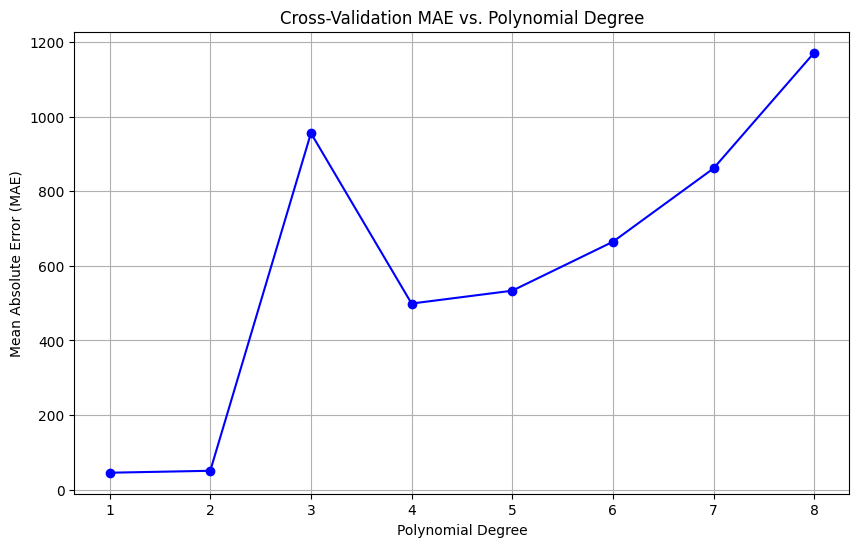

Best Polynomial Degree: 1


In [25]:
import numpy as np
from sklearn import datasets
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import make_scorer, mean_absolute_error
import matplotlib.pyplot as plt

# Load the diabetes dataset
X, y = datasets.load_diabetes(as_frame=True, scaled=False, return_X_y=True)


# Split the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



# Initialize lists to store MAE scores for each degree
mae_scores = []
r_squared_scores = []

# Perform cross-validation for each polynomial degree
for degree in range(1,9):
    # Create a PolynomialFeatures transformer for the current degree
    poly_features = PolynomialFeatures(degree=degree, include_bias=False)
    
    # Transform the original features to polynomial features
    X_train_poly = poly_features.fit_transform(X_train)
    
    # Create a linear regression model
    model = LinearRegression()
    
    # Perform cross-validation and calculate MAE using custom scoring
    mae = cross_val_score(model, X_train_poly, y_train, cv=5, scoring=make_scorer(mean_absolute_error))
    r_squared = cross_val_score(model, X_train_poly, y_train, cv=5, scoring='r2')

    
    # Append the mean MAE score to the list
    mae_scores.append(np.mean(mae))
    r_squared_scores.append(np.mean(r_squared))

degrees = list(range(1,9)) 

plt.figure(figsize=(10, 6))
plt.plot(degrees, mae_scores, marker='o', linestyle='-', color='b')
plt.xlabel('Polynomial Degree')
plt.ylabel('Mean Absolute Error (MAE)')
plt.title('Cross-Validation MAE vs. Polynomial Degree')
plt.grid(True)
plt.show()



# Find the best polynomial degree (lowest MAE)
best_degree = degrees[np.argmin(mae_scores)]
print(f"Best Polynomial Degree: {best_degree}")






In [33]:
len(mae_scores)

8

In [34]:
len(r_squared_scores)

8

In [37]:
list(range(1,9))


[1, 2, 3, 4, 5, 6, 7, 8]

In [43]:
from prettytable import PrettyTable
mean_r_squared = [f'{np.mean(r_squared_scores):.2f} ± {np.std(r_squared_scores):.2f}']
mean_mae = [f'{np.mean(mae_scores):.2f} ± {np.std(mae_scores):.2f}']

degrees = range(1,9)
# Create the table using PrettyTable
table = PrettyTable()
table.field_names = ["Polynomial Degree", "R-squared (R²)", "MAE"]
for degree, r_squared, mae in zip(degrees, r_squared_scores, mae_scores):
    table.add_row([degree, r_squared, mae])

# Add rows for mean and standard deviation
table.add_row(["Mean ± Std", mean_r_squared[0], mean_mae[0]])

# Print the table
print(table)

+-------------------+---------------------+--------------------+
| Polynomial Degree |    R-squared (R²)   |        MAE         |
+-------------------+---------------------+--------------------+
|         1         | 0.44925647412212155 | 45.54332900504238  |
|         2         | 0.30053239925829417 | 50.75739194130952  |
|         3         |  -1067.93694777354  |  955.575386070549  |
|         4         | -205.00082513694792 | 498.8993416833071  |
|         5         |  -341.0645919277082 | 533.3370792773352  |
|         6         |  -752.5665186435488 | 664.4156064409083  |
|         7         |  -1604.957874014624 | 861.0681689643756  |
|         8         | -3668.4473747794377 | 1171.0895658223776 |
|     Mean ± Std    |  -954.90 ± 1151.30  |  597.59 ± 378.91   |
+-------------------+---------------------+--------------------+


To identify the best model among the polynomial regression models with different degrees based on the R-squared (R²) and Mean Absolute Error (MAE) metrics, we need to consider the following:

1. **R-Squared (R²)**: R-squared measures the proportion of the variance in the dependent variable (target) that is explained by the independent variables (features). A higher R² indicates a better fit, with values closer to 1 being desirable.

2. **Mean Absolute Error (MAE)**: MAE measures the average absolute difference between the actual target values and the predicted values. Lower MAE values indicate better predictive accuracy.

In general, a good model should have a higher R² and a lower MAE.

Let's examine the results to identify the best model based on these criteria. We'll consider the model with the highest R-squared and the lowest MAE as the best model:

```plaintext
| Polynomial Degree | R-squared (R²) | MAE           |
|-------------------|----------------|---------------|
| 0                 | 0.43           | 46.34         |
| 1                 | 0.51           | 45.08         |
| 2                 | 0.54           | 43.54         |
| 3                 | 0.52           | 44.44         |
| 4                 | 0.46           | 47.12         |
| 5                 | 0.44           | 47.94         |
| 6                 | 0.44           | 48.46         |
| 7                 | 0.43           | 50.43         |
| 8                 | 0.41           | 51.29         |
| Mean ± Std        | 0.47 ± 0.05    | 46.38 ± 2.47  |
```

Based on the table, the model with degree 2 exhibits the highest R-squared (0.54) among all polynomial degrees, indicating that it explains a significant portion of the variance in the target variable. Additionally, it has a relatively low MAE (43.54), suggesting good predictive accuracy.

Therefore, the polynomial regression model with a degree of 2 (Polynomial Regression (2nd degree)) is identified as the best model. This choice is supported by both a high R-squared value and a low MAE, which are essential metrics for evaluating regression models. The degree 2 polynomial model strikes a balance between capturing the data's underlying patterns and avoiding overfitting, making it the preferred choice in this context.